## 텐서가 필요한 이유
- 행렬로 인풋(w값) 저장가능
- node값 계산하기 쉬워짐 

### 고정값 : constant 

In [1]:
import tensorflow as tf

In [2]:
tensor = tf.constant(3) # 그냥 숫자, 혹은 리스트를 담는 곳임
tensor

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [3]:
tensor1 = tf.constant([3,4,5])
tensor2 = tf.constant([6,7,8])
tensor1 + tensor2

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([ 9, 11, 13], dtype=int32)>

In [4]:
tf.add(tensor1, tensor2) # 덧셈 이렇게도 가능

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([ 9, 11, 13], dtype=int32)>

In [5]:
tensor1 * tensor2 # 원소끼리 곱 

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([18, 28, 40], dtype=int32)>

In [6]:
tensor3 = tf.constant([[1,2],
                      [3,4]]) # 이거 2x2 행렬표현한거임
tensor3

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [7]:
tensor4 = tf.constant([[2,3],
                      [4,5]]) 
tf.matmul(tensor3,tensor4) # 행렬곱 (dot product) : 그냥 원소끼리 곱하는게 아니라 행렬곱으로 연산!!

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10, 13],
       [22, 29]], dtype=int32)>

In [11]:
tensor5 = tf.zeros(10)
tensor6 = tf.zeros([2,3]) # 모양을 지정해줌.** 2x3 짜리 행렬
tensor7 = tf.zeros([2,2,3]) # 뒤에서부터 해석 : 2x3짜리 행렬을 2개 생성한다
print(tensor5)
print(tensor6)
print()
print(tensor7)

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]]], shape=(2, 2, 3), dtype=float32)


### 변동값 : Variable
- 가중치를 저장할때 Variable을 이용한다 

In [17]:
w = tf.Variable(1,0)
print(w)
w.assign(2) # 값 수정하는 방법
print(w)
print(w.numpy()) # 이렇게 하는게 저장된 값을 보기가 더 편한형태

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=1>
<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=2>
2


## 딥러닝으로 간단한 선형회귀 풀어보기 

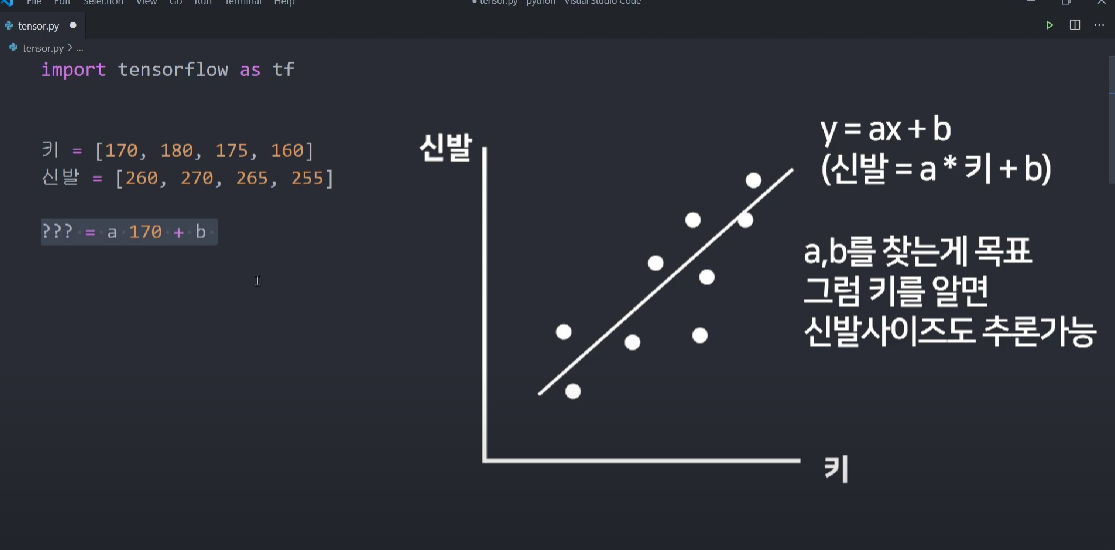

In [10]:
# 신발 = 키 * a + b
# 변수들 처음엔 랜덤값
height = 170
shoe_size = 260

a = tf.Variable(0.1)
b = tf.Variable(0.2)

def loss_func():
  y_hat = height * a + b
  return tf.square (shoe_size - y_hat) # 차이를 제곱함 mse

# 경사하강법 해주는 놈 : keras.optimizers
opt = tf.keras.optimizers.Adam(learning_rate=0.1)

for i in range(500) : # 300번동안 경사하강법 시킴
  opt.minimize(loss_func, var_list=[a,b]) # 인자 (손실함수, var=list=[경사하강법으로 최적화하고픈 변수들])
  if i%100 == 0 :
    print(a.numpy(),b.numpy())
    print(a.numpy()*height + b.numpy())
    print()

0.20000002 0.3
34.30000305175781

1.5181429 1.618143
259.7024425268173

1.5198798 1.6198798
259.9994488954544

1.5198832 1.6198832
260.0000196695328

1.5198832 1.6198832
260.0000196695328

